<a href="https://colab.research.google.com/github/dadakhalander/anaconda-/blob/main/ml_ass_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
!pip install scipy
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load & Explore the Data

In [ ]:
df = pd.read_csv('/content/E_Commerce_Data_Set_4034.csv')

In [ ]:
df.head()

,Genre,Age,Annual_Income (£K),Spending_Score
0,Male,24.0,62.0,13.0
1,Male,52.0,59.0,35.0
2,Female,42.0,31.0,12.0
3,Female,20.0,92.0,41.0
4,Female,30.0,52.0,40.0


In [ ]:
import pandas as pd
# Assuming 'Gender' is the column name for male/female
df = pd.get_dummies(df, columns=['Genre'], prefix=['Gender'])
print(df.head())


    Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male
0  24.0                62.0            13.0          False         True
1  52.0                59.0            35.0          False         True
2  42.0                31.0            12.0           True        False
3  20.0                92.0            41.0           True        False
4  30.0                52.0            40.0           True        False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 775 non-null    float64
 1   Annual_Income (£K)  781 non-null    float64
 2   Spending_Score      785 non-null    float64
 3   Gender_Female       800 non-null    bool   
 4   Gender_Male         800 non-null    bool   
dtypes: bool(2), float64(3)
memory usage: 20.4 KB


In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income (£K)'] = pd.to_numeric(df['Annual_Income (£K)'], errors='coerce')
df['Spending_Score'] = pd.to_numeric(df['Spending_Score'], errors='coerce')


In [ ]:
df.dtypes

,0
Age,float64
Annual_Income (£K),float64
Spending_Score,float64
Gender_Female,bool
Gender_Male,bool


In [ ]:
df.isnull().sum()

,0
Age,25
Annual_Income (£K),19
Spending_Score,15
Gender_Female,0
Gender_Male,0


In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)  # Choose 5 closest neighbors
df[['Age', 'Annual_Income (£K)', 'Spending_Score']] = knn_imputer.fit_transform(df[['Age', 'Annual_Income (£K)', 'Spending_Score']])


In [ ]:
df.isnull().sum()

,0
Age,0
Annual_Income (£K),0
Spending_Score,0
Gender_Female,0
Gender_Male,0


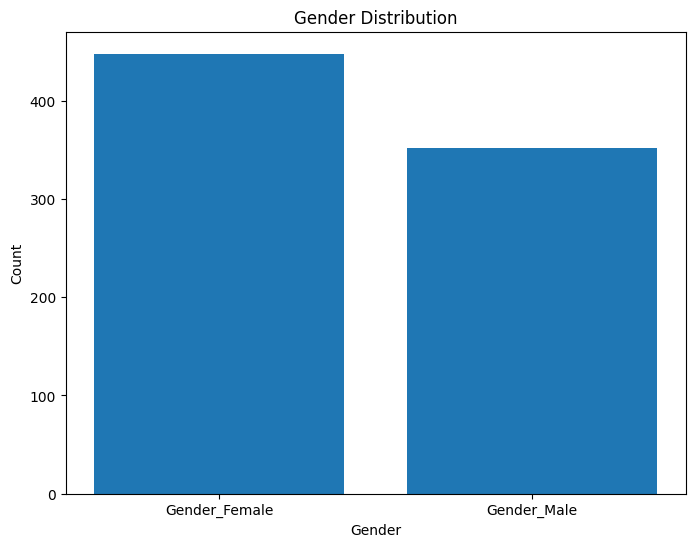

In [ ]:
gender_counts = df[['Gender_Female', 'Gender_Male']].sum()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()


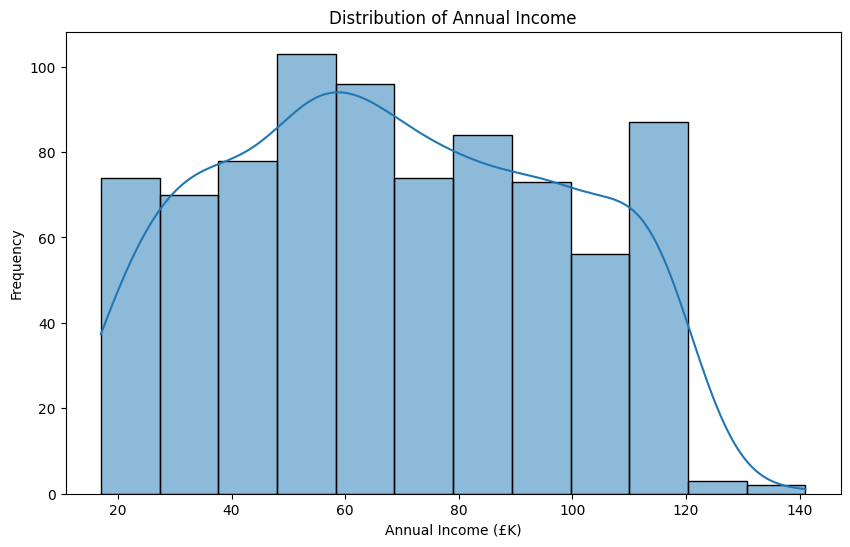

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Income (£K)'], kde=True)  # Histogram with KDE
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (£K)')
plt.ylabel('Frequency')
plt.show()

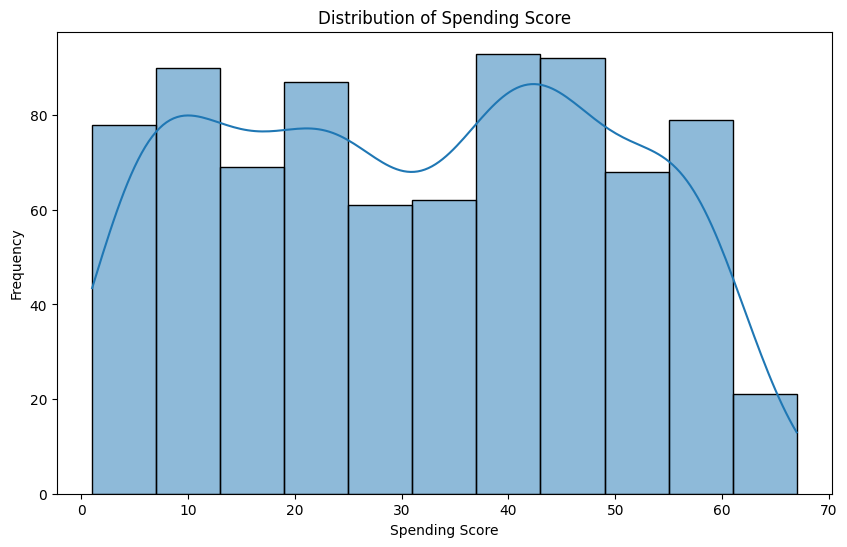

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending_Score'], kde=True)  # Histogram with KDE
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

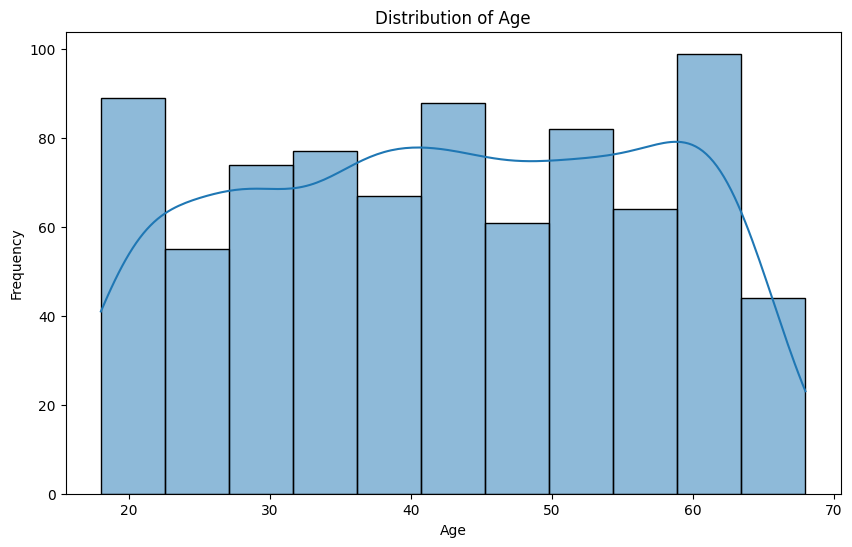

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)  # Histogram with KDE
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# outliers and z-score

In [ ]:
# Identify outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
print("Outliers using IQR:")
for col in ['Age', 'Annual_Income (£K)', 'Spending_Score']:
    print(f"{col} Outliers:\n", detect_outliers_iqr(df, col))

Outliers using IQR:
Age Outliers:
 Empty DataFrame
Columns: [Age, Annual_Income (£K), Spending_Score, Gender_Female, Gender_Male]
Index: []
Annual_Income (£K) Outliers:
 Empty DataFrame
Columns: [Age, Annual_Income (£K), Spending_Score, Gender_Female, Gender_Male]
Index: []
Spending_Score Outliers:
 Empty DataFrame
Columns: [Age, Annual_Income (£K), Spending_Score, Gender_Female, Gender_Male]
Index: []


In [ ]:
outliers.count()

0

In [ ]:
# Detecting outliers using Z-score method
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    outliers = df[np.abs(z_scores) > threshold]
    return outliers

In [ ]:
print("\nOutliers using Z-score:")
for col in ['Age', 'Annual_Income (£K)', 'Spending_Score']:
    print(f"{col} Outliers:\n", detect_outliers_zscore(df, col))


Outliers using Z-score:
Age Outliers:
 Empty DataFrame
Columns: [Age, Annual_Income (£K), Spending_Score, Gender_Female, Gender_Male]
Index: []
Annual_Income (£K) Outliers:
 Empty DataFrame
Columns: [Age, Annual_Income (£K), Spending_Score, Gender_Female, Gender_Male]
Index: []
Spending_Score Outliers:
 Empty DataFrame
Columns: [Age, Annual_Income (£K), Spending_Score, Gender_Female, Gender_Male]
Index: []


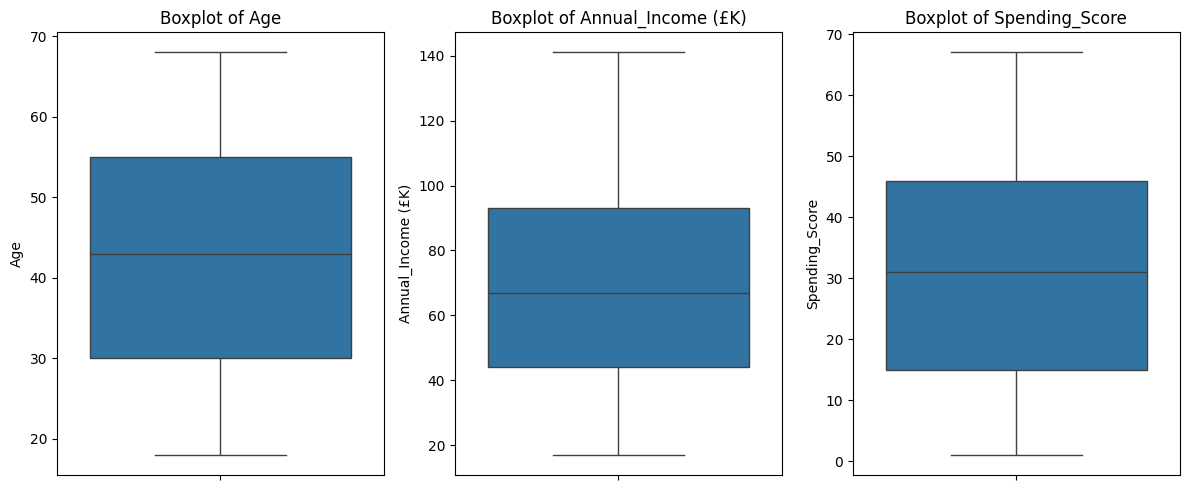

In [ ]:
# Visualizing Outliers using Boxplots
plt.figure(figsize=(12, 5))
for i, col in enumerate(['Age', 'Annual_Income (£K)', 'Spending_Score'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# graphs

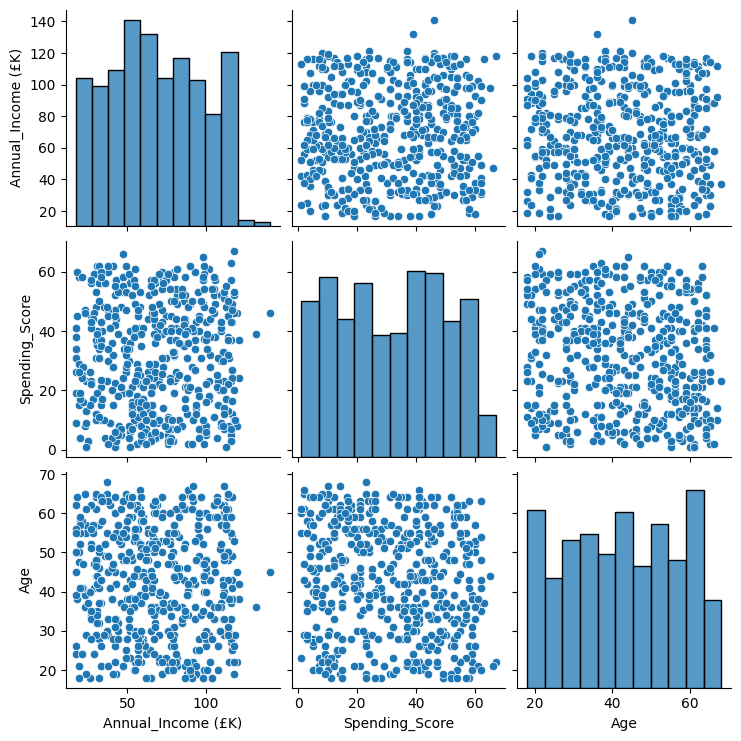

In [ ]:
# Pair Plot
sns.pairplot(df[['Annual_Income (£K)', 'Spending_Score', 'Age']])
plt.show()

In [ ]:
corr_matrix = df.corr()


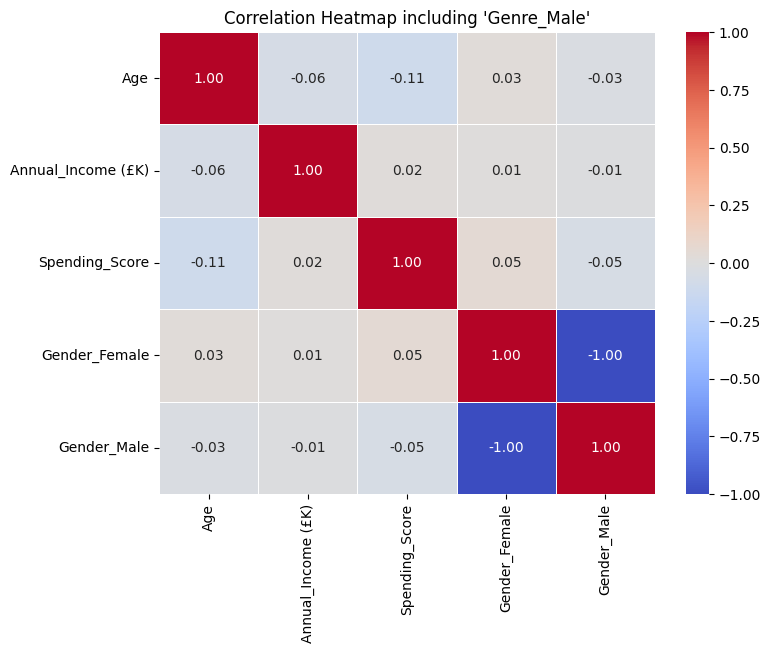

In [ ]:
# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap including 'Genre_Male'")
plt.show()

#  Data Preprocessing

Normalization (or feature scaling) is crucial in clustering because clustering algorithms rely on distance measurements (like Euclidean distance). If the data is not normalized, features with larger scales (e.g., annual income) can dominate the clustering process and distort results.



1.Without normalization, clustering would give more weight to Annual_Income simply because it has larger values.



2.Improve Distance-Based Calculations

    Most clustering algorithms (K-Means, Hierarchical, DBSCAN) use Euclidean distance.
    Larger magnitude features dominate smaller ones, leading to biased clusters.
3.Better Model Performance
Normalized data leads to faster convergence and more accurate clusters.



4. Use standardization for clustering (e.g., K-Means, PCA).

5. Use normalization if you want data in a uniform range (e.g., for neural networks)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 800 non-null    float64
 1   Annual_Income (£K)  800 non-null    float64
 2   Spending_Score      800 non-null    float64
 3   Gender_Female       800 non-null    bool   
 4   Gender_Male         800 non-null    bool   
dtypes: bool(2), float64(3)
memory usage: 20.4 KB


In [ ]:
#: Apply Normalization and Standardization ---
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [ ]:
# Select numerical columns for scaling
num_cols = ['Age', 'Annual_Income (£K)', 'Spending_Score']

In [ ]:
# Standardization (Z-score scaling)
data_standardized = df.copy()
data_standardized[num_cols] = scaler_standard.fit_transform(df[num_cols])

In [ ]:
data_standardized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male
0,-1.313270,-0.213815,-1.017854,False,True
1,0.678284,-0.316344,0.206665,False,True
2,-0.032985,-1.273280,-1.073514,True,False
3,-1.597778,0.811473,0.540625,True,False
4,-0.886509,-0.555578,0.484965,True,False
...,...,...,...,...,...
795,0.080818,0.401358,-0.683894,True,False
796,-1.028763,-0.623931,0.151005,True,False
797,0.322650,1.050707,-1.630113,False,True
798,-0.388620,0.162124,1.375524,False,True


In [ ]:
# Normalization (Min-Max scaling)
data_normalized = df.copy()
data_normalized[num_cols] = scaler_minmax.fit_transform(df[num_cols])

In [ ]:
data_normalized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male
0,0.120,0.362903,0.181818,False,True
1,0.680,0.338710,0.515152,False,True
2,0.480,0.112903,0.166667,True,False
3,0.040,0.604839,0.606061,True,False
4,0.240,0.282258,0.590909,True,False
...,...,...,...,...,...
795,0.512,0.508065,0.272727,True,False
796,0.200,0.266129,0.500000,True,False
797,0.580,0.661290,0.015152,False,True
798,0.380,0.451613,0.833333,False,True


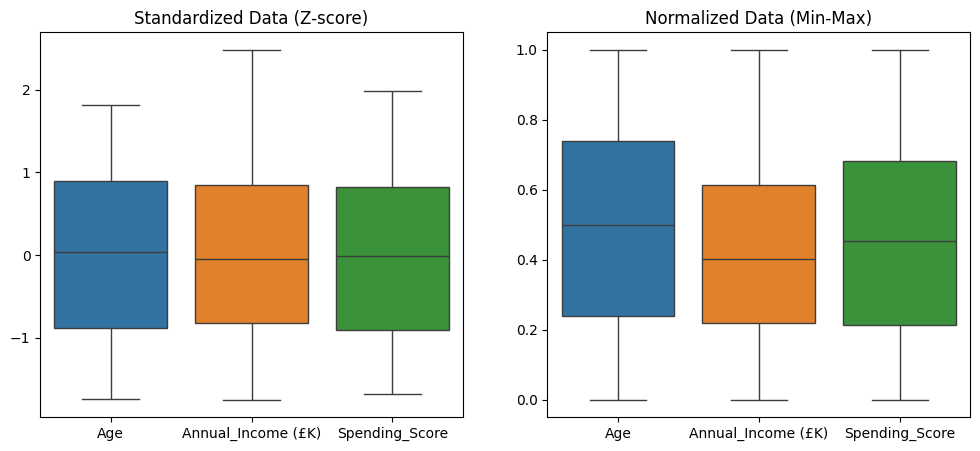

In [ ]:
# Visualize the Scaled Data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=data_standardized[num_cols], ax=axes[0])
axes[0].set_title("Standardized Data (Z-score)")

sns.boxplot(data=data_normalized[num_cols], ax=axes[1])
axes[1].set_title("Normalized Data (Min-Max)")

plt.show()

Principal Component Analysis (PCA)

PCA finds the principal components that capture the most variance in the data, reducing the number of features while retaining the maximum possible information.

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
principal_components = pca.fit_transform(data_standardized[num_cols])


In [ ]:
principal_components

array([[-0.18732165,  0.188041  ],
       [ 0.46069894, -0.32122561],
       [ 1.13814901, -0.61381619],
       ...,
       [ 0.81072197,  1.71766405],
       [-1.17561479, -0.53791514],
       [ 0.08829942, -1.86508577]])

In [ ]:
# Convert to DataFrame for easier plotting
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])


In [ ]:
pca_df

,PC1,PC2
0,-0.187322,0.188041
1,0.460699,-0.321226
2,1.138149,-0.613816
3,-1.743430,0.329904
4,-0.686028,-0.787364
...,...,...
795,0.318347,0.681638
796,-0.550927,-0.701079
797,0.810722,1.717664
798,-1.175615,-0.537915


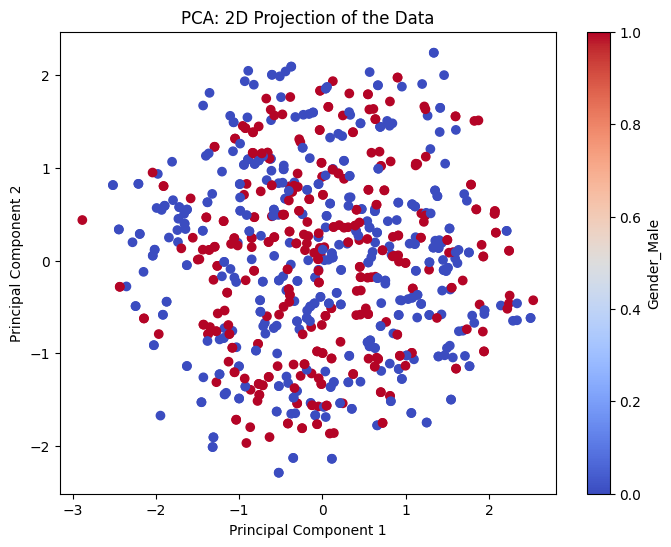

In [ ]:
# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Gender_Male'], cmap='coolwarm')
plt.title('PCA: 2D Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Gender_Male')
plt.show()


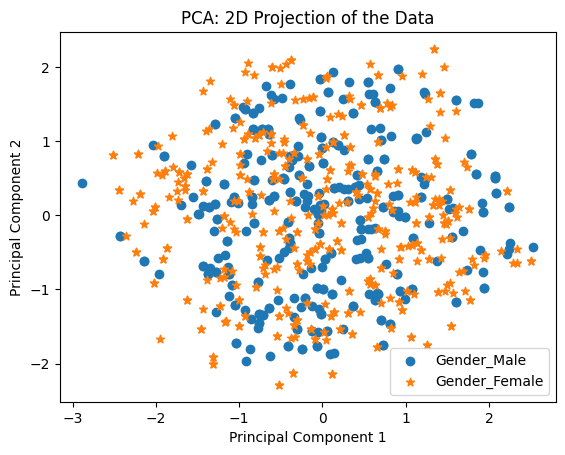

In [ ]:
markers = {'Gender_Male': 'o', 'Gender_Female': '*'}

# Loop through the gender labels and assign markers
for gender, marker in markers.items():
    if gender == 'Gender_Male':
        gender_data = pca_df[df['Gender_Male'] == 1]
    else:
        gender_data = pca_df[df['Gender_Male'] == 0]

    plt.scatter(gender_data['PC1'], gender_data['PC2'],
                marker=marker, label=gender)


 # Title and labels
plt.title('PCA: 2D Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.show()


 2. t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a non-linear dimensionality reduction technique particularly useful for visualizing high-dimensional data in 2D or 3D. Unlike PCA, t-SNE focuses on preserving local structures and is especially effective for visualizing clusters.

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(data_standardized[num_cols])

In [ ]:
# Convert to DataFrame for easier plotting
tsne_df = pd.DataFrame(tsne_components, columns=['TSNE1', 'TSNE2'])

In [ ]:
tsne_df

,TSNE1,TSNE2
0,9.406276,-1.927047
1,-7.990710,8.302990
2,19.666212,-17.212315
3,-33.704002,-3.983399
4,-9.361959,-13.145524
...,...,...
795,6.268682,7.628342
796,-7.106832,-13.106503
797,11.093751,29.702904
798,-20.285589,-9.774210


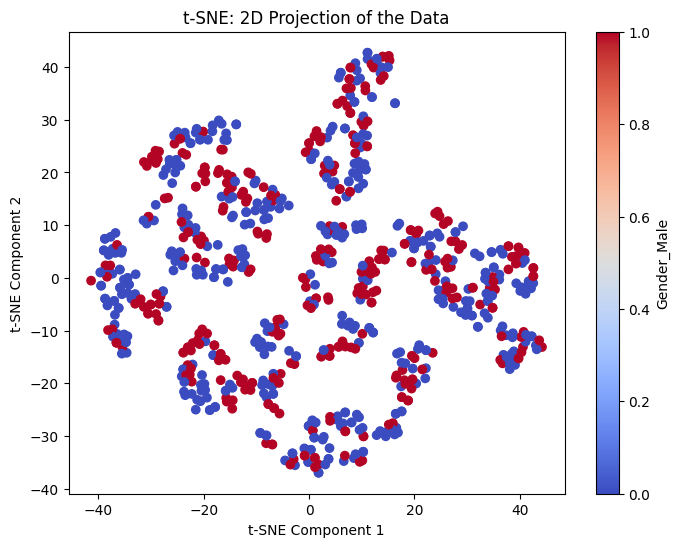

In [ ]:
# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=df['Gender_Male'], cmap='coolwarm')
plt.title('t-SNE: 2D Projection of the Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Gender_Male')
plt.show()

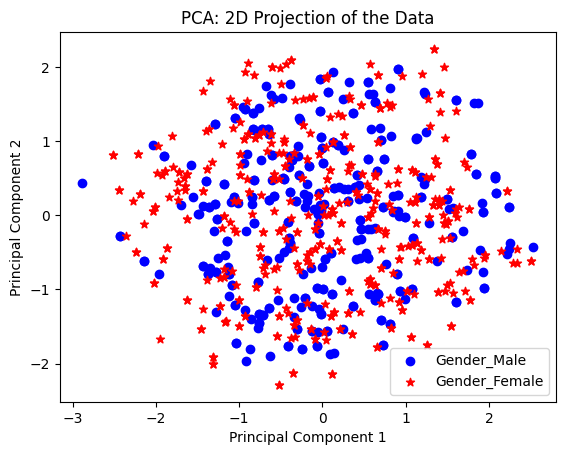

In [ ]:
markers = {'Gender_Male': 'o', 'Gender_Female': '*'}

# Loop through the gender labels and assign markers
for gender, marker in markers.items():
    if gender == 'Gender_Male':
        gender_data = pca_df[df['Gender_Male'] == 1]  # Male data points
        color = 'blue'  # Assign a color for male (you can choose any color)
    else:
        gender_data = pca_df[df['Gender_Male'] == 0]  # Female data points
        color = 'red'  # Assign a color for female (you can choose any color)

    plt.scatter(gender_data['PC1'], gender_data['PC2'],
                marker=marker, label=gender, color=color)


 # Title and labels
plt.title('PCA: 2D Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.show()



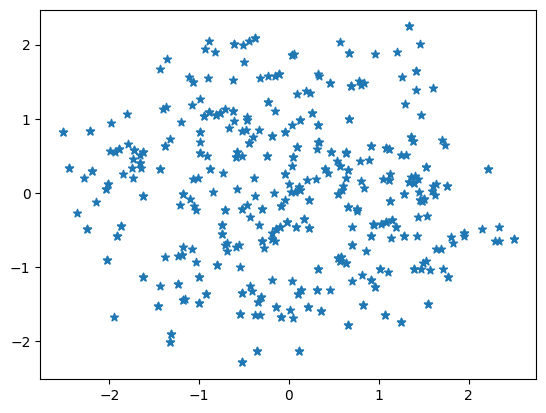

In [ ]:
plt.scatter(gender_data['PC1'], gender_data['PC2'],
                marker=marker, label=gender)

# Apply Different Clustering Techniques

### k means

Before performing K-Means, ensure your data is normalized or standardized to avoid scale dominance.

K-Means Clustering with Elbow Method & Silhouette Score.


  1. Elbow Method: This method helps determine the number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The "elbow" in the plot indicates the optimal number of clusters.

  2. We plot the Within-Cluster Sum of Squares (WCSS) against different values of K (the number of clusters). The "elbow" point indicates the optimal number of clusters.

In [ ]:
df

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male
0,24.0,62.0,13.0,False,True
1,52.0,59.0,35.0,False,True
2,42.0,31.0,12.0,True,False
3,20.0,92.0,41.0,True,False
4,30.0,52.0,40.0,True,False
...,...,...,...,...,...
795,43.6,80.0,19.0,True,False
796,28.0,50.0,34.0,True,False
797,47.0,99.0,2.0,False,True
798,37.0,73.0,56.0,False,True


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for different values of K (from 1 to 10)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

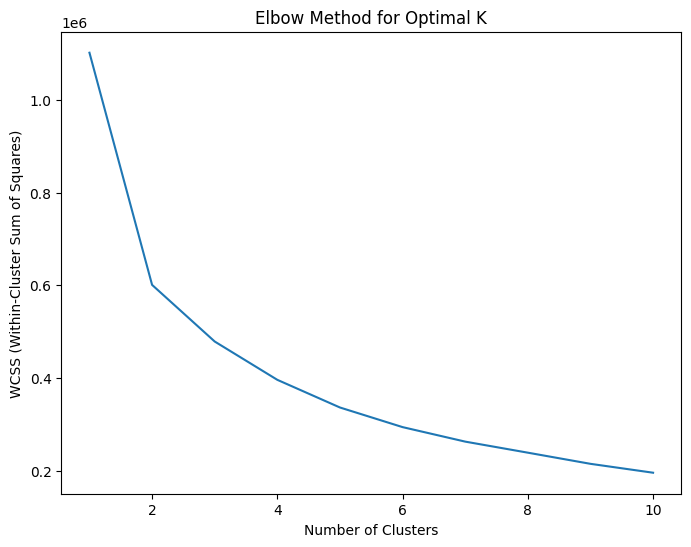

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Look for the "elbow" where the rate of decrease in WCSS slows down. This point gives the optimal number of clusters.

2. Silhouette Score

Once you identify a range of possible cluster numbers using the Elbow Method, you can calculate the Silhouette Score to confirm the best number of clusters.



This metric evaluates how well each data point fits within its assigned cluster. A higher score indicates better-defined clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette score for different values of K
silhouette_scores = []
for i in range(2, 11):  # Start from 2 because silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))


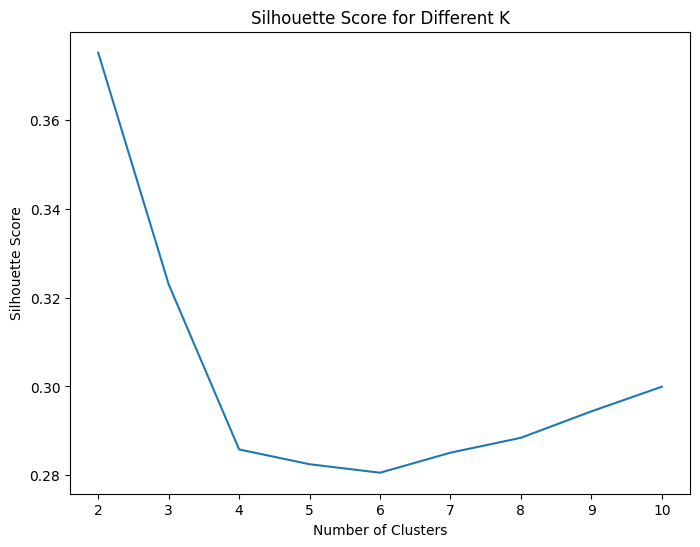

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Interpretation:

The Silhouette Score ranges from -1 to 1:

1 indicates well-defined clusters.

0 indicates overlapping clusters.

-1 suggests poor clustering.

fitting the k model

In [ ]:
# Let's assume the optimal number of clusters is 4 (based on Elbow and Silhouette Score)
kmeans_optimal = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans_optimal.fit_predict(df)


In [ ]:

data_standardized['Cluster_k']=y_kmeans

In [ ]:
data_standardized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,GMM_Cluster,Cluster_k
0,-1.313270,-0.213815,-1.017854,False,True,0,2,2
1,0.678284,-0.316344,0.206665,False,True,3,0,2
2,-0.032985,-1.273280,-1.073514,True,False,1,2,2
3,-1.597778,0.811473,0.540625,True,False,0,1,0
4,-0.886509,-0.555578,0.484965,True,False,1,0,1
...,...,...,...,...,...,...,...,...
795,0.080818,0.401358,-0.683894,True,False,2,1,3
796,-1.028763,-0.623931,0.151005,True,False,1,0,1
797,0.322650,1.050707,-1.630113,False,True,3,1,3
798,-0.388620,0.162124,1.375524,False,True,1,1,0


In [ ]:
df['Cluster_k']=y_kmeans

In [ ]:
df.head()

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster,Cluster_k
0,24.0,62.0,13.0,False,True,2,2
1,52.0,59.0,35.0,False,True,2,2
2,42.0,31.0,12.0,True,False,2,2
3,20.0,92.0,41.0,True,False,0,0
4,30.0,52.0,40.0,True,False,1,1


In [ ]:
# Create separate DataFrames for each cluster

cluster_dfs = {}
for cluster_label in df['Cluster'].unique():
    cluster_dfs[cluster_label] = df[df['Cluster'] == cluster_label]

In [ ]:
# Print some info about the clusters
for cluster_label, cluster_df in cluster_dfs.items():
  print(f"Cluster {cluster_label}:")
  print(cluster_df.head(5))
  print("-" * 20)

Cluster 2:
    Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
0  24.0                62.0            13.0          False         True   
1  52.0                59.0            35.0          False         True   
2  42.0                31.0            12.0           True        False   
6  63.0                49.0            26.0           True        False   
8  61.0                56.0            18.0          False         True   

   Cluster  
0        2  
1        2  
2        2  
6        2  
8        2  
--------------------
Cluster 0:
     Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
3   20.0                92.0            41.0           True        False   
9   32.0                85.0            41.0           True        False   
12  53.0                77.0            37.0           True        False   
19  19.0               118.0            52.0           True        False   
23  52.0                87.0            44.0    

In [ ]:
# Visualize clusters in a 2D plot (using the first two principal components or PCA for better visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

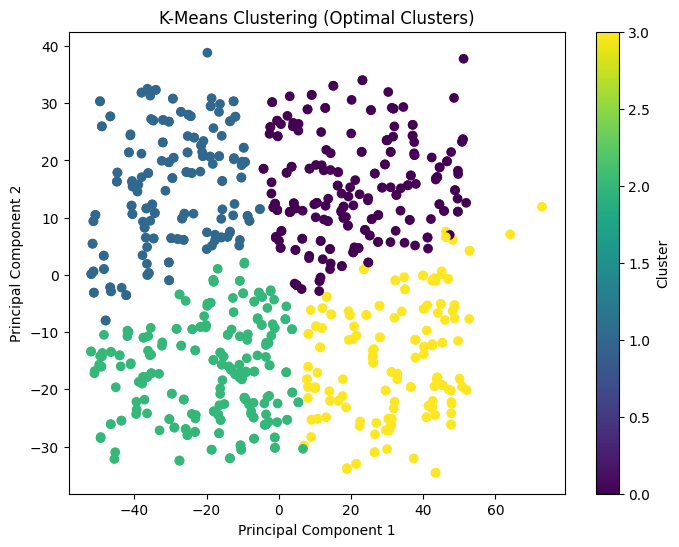

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (Optimal Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Interpretation of Visualization:

1. Each dot represents a data point, colored based on its assigned cluster.

2. The plot helps identify how well-separated the clusters are. If clusters are distinct, it indicates effective clustering.

3. Clusters that are more spread out have higher variability, whereas tightly packed clusters suggest more uniform groups.

In [ ]:
# Profile each cluster by calculating mean values for features
cluster_profiles = df.groupby('Cluster').mean()
cluster_profiles



,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male
Cluster,,,,,
0,40.127854,89.025571,46.865753,0.566210,0.433790
1,40.522751,38.165079,45.508995,0.587302,0.412698
2,46.758036,49.560714,14.532143,0.553571,0.446429
3,41.966667,99.961905,17.319048,0.529762,0.470238


Cluster Profiling


1. Once you know the cluster labels, you can profile each cluster by calculating the mean values for each feature within the cluster.

2. The cluster profile helps understand the characteristics of each group.

3. For example, Cluster 0 might have an average age of 25, moderate spending, and lower income, whereas Cluster 1 might represent older users with higher income and more spending

### Hierarchical Clustering

In [ ]:
data_standardized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,GMM_Cluster,Cluster_k
0,-1.313270,-0.213815,-1.017854,False,True,0,2,2
1,0.678284,-0.316344,0.206665,False,True,3,0,2
2,-0.032985,-1.273280,-1.073514,True,False,1,2,2
3,-1.597778,0.811473,0.540625,True,False,0,1,0
4,-0.886509,-0.555578,0.484965,True,False,1,0,1
...,...,...,...,...,...,...,...,...
795,0.080818,0.401358,-0.683894,True,False,2,1,3
796,-1.028763,-0.623931,0.151005,True,False,1,0,1
797,0.322650,1.050707,-1.630113,False,True,3,1,3
798,-0.388620,0.162124,1.375524,False,True,1,1,0


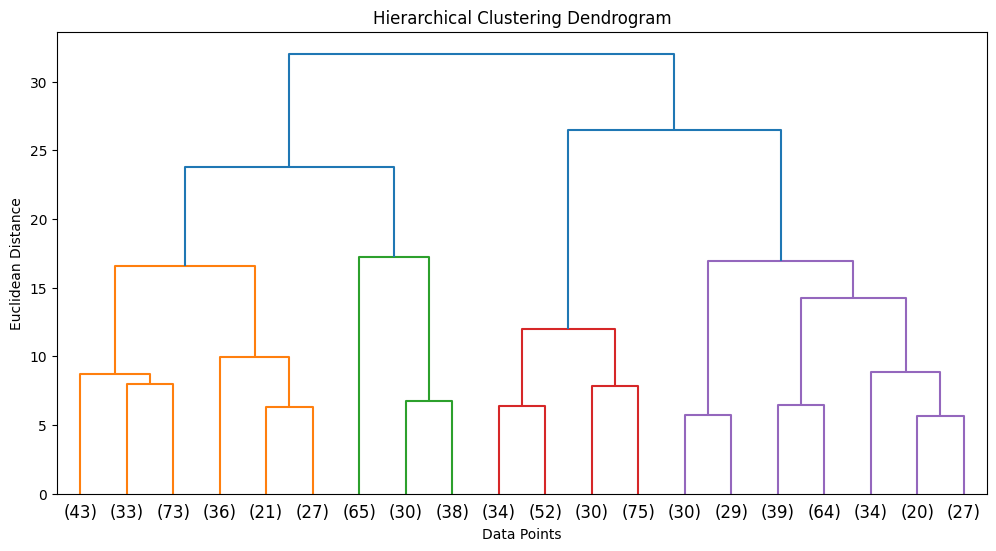

In [ ]:
#  Create a Dendrogram to Determine Optimal Clusters
plt.figure(figsize=(12, 6))

# Using Ward's method (minimizes variance)
linked = linkage(data_standardized[num_cols], method='ward')

# Plot the Dendrogram
dendrogram(linked, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

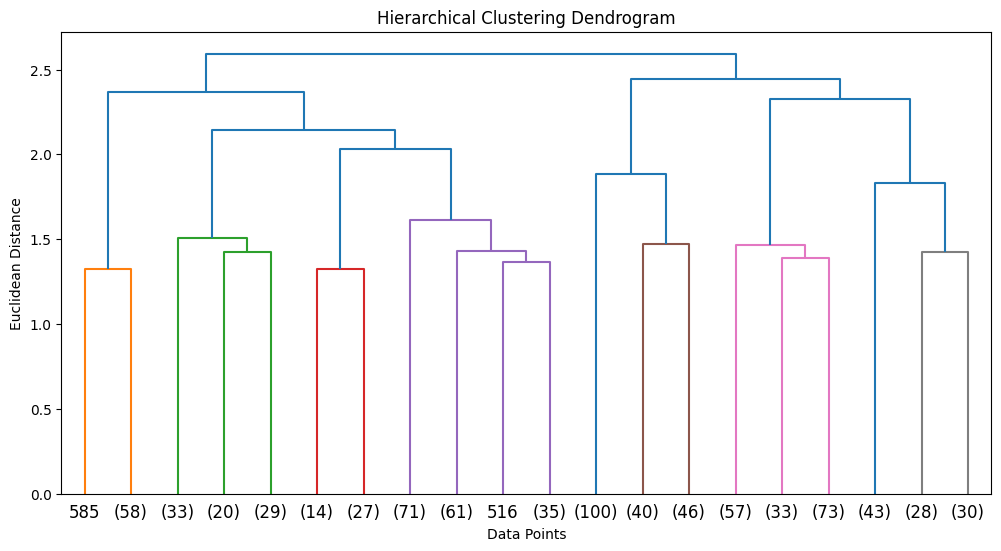

In [ ]:
#  Create a Dendrogram to Determine Optimal Clusters
plt.figure(figsize=(12, 6))

# Using Ward's method (minimizes variance)
linked = linkage(data_standardized[num_cols], method='average')

# Plot the Dendrogram
dendrogram(linked, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

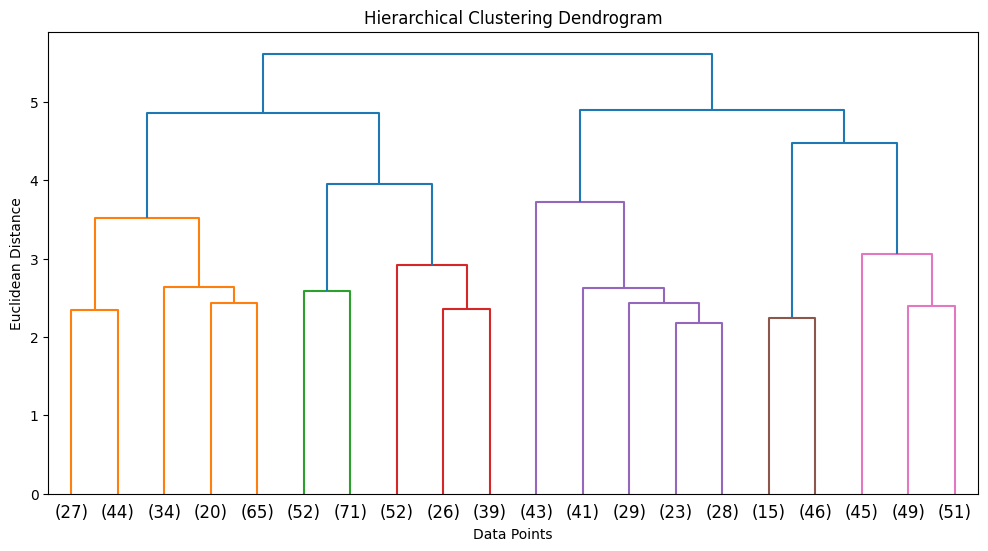

In [ ]:
#  Create a Dendrogram to Determine Optimal Clusters
plt.figure(figsize=(12, 6))

# Using Ward's method (minimizes variance)
linked = linkage(data_standardized[num_cols], method='complete')

# Plot the Dendrogram
dendrogram(linked, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#  Apply Agglomerative Clustering (Choose 3 or 4 clusters based on dendrogram)
num_clusters = 4  # Adjust this based on the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters,  linkage='ward')
clusters = agg_clustering.fit_predict(data_standardized[num_cols])

In [ ]:
# Add cluster labels to the dataframe
data_standardized['Cluster_hc'] = clusters

In [ ]:
data_standardized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,GMM_Cluster,Cluster_k,Cluster_DBSCAN
0,-1.313270,-0.213815,-1.017854,False,True,0,2,2,0
1,0.678284,-0.316344,0.206665,False,True,3,0,2,0
2,-0.032985,-1.273280,-1.073514,True,False,1,2,2,0
3,-1.597778,0.811473,0.540625,True,False,0,1,0,0
4,-0.886509,-0.555578,0.484965,True,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...
795,0.080818,0.401358,-0.683894,True,False,2,1,3,0
796,-1.028763,-0.623931,0.151005,True,False,1,0,1,0
797,0.322650,1.050707,-1.630113,False,True,3,1,3,0
798,-0.388620,0.162124,1.375524,False,True,1,1,0,0


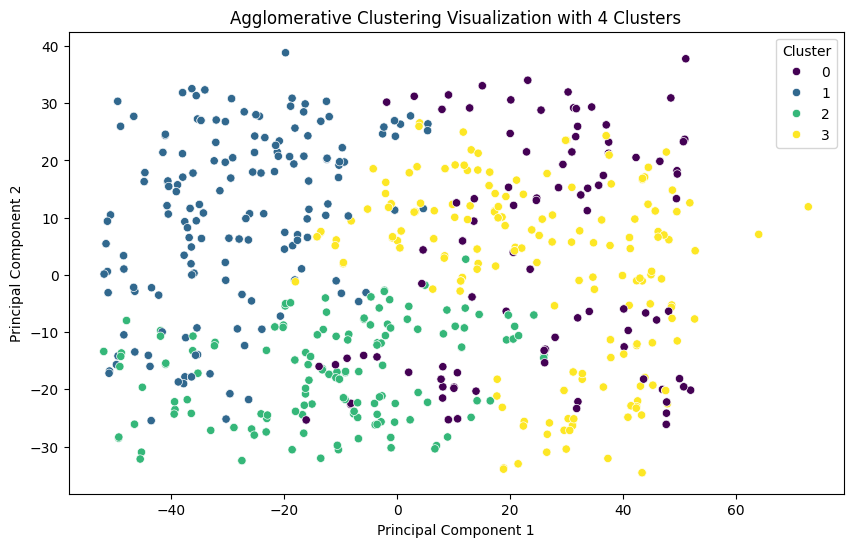

In [ ]:
#  Visualize Clusters using PCA (2D)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=data_standardized['Cluster_hc'], palette='viridis')
plt.title(f'Agglomerative Clustering Visualization with {num_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Explanation

1. Dendrogram Analysis
The dendrogram helps find the optimal number of clusters.
Look for the longest vertical line before a big jump (elbow method).
Example: If the largest gap occurs between 3 and 4 clusters, we choose 3 clusters.
2. Applying Agglomerative Clustering
We use Ward’s method (minimizes variance) and Euclidean distance.
The algorithm starts with each point as its own cluster and merges similar clusters step by step.
3. Visualizing Clusters with PCA
We use PCA to plot data in 2D space.
Clusters should ideally be well-separated.

Key points:

1. Dendrogram Interpretation:
    Helps decide the number of clusters
    before applying clustering algorithms.
2. Agglomerative Clustering:
    Works well for small-to-medium datasets.

    Captures hierarchical relationships between clusters.
3. Comparison with K-Means:
    Unlike K-Means, hierarchical clustering doesn’t need a predefined number of clusters.

    More interpretable, but computationally expensive for very large datasets.

### Fine-Tuning Cluster Count Using the Dendrogram

not working

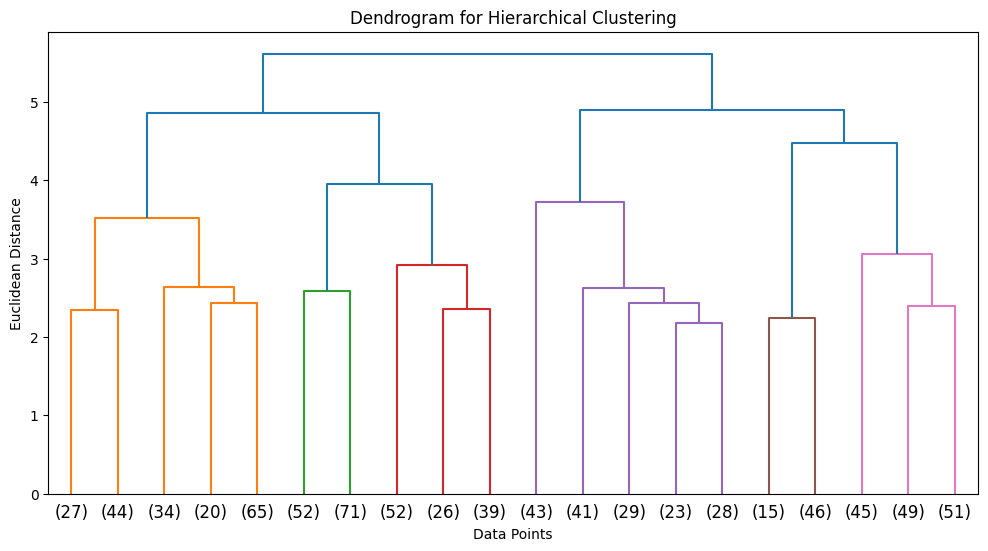

In [ ]:
#  Generate the Dendrogram
plt.figure(figsize=(12, 6))

# Using Ward's method for hierarchical clustering
linked = linkage(data_standardized[num_cols], method='complete')

# Plot the full dendrogram
dendrogram(linked, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.axhline(y=150, color='r', linestyle='--')  # Adjust this threshold based on the dendrogram
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#  Determine the Optimal Number of Clusters
# Cut the dendrogram at a chosen height
optimal_clusters = fcluster(linked, t=50, criterion='distance')  # Adjust t based on dendrogram
num_clusters = len(set(optimal_clusters))
print(f"Optimal Number of Clusters Based on Dendrogram: {num_clusters}")

Optimal Number of Clusters Based on Dendrogram: 1


In [ ]:
#  Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters,  linkage='ward')
clusters = agg_clustering.fit_predict(data_standardized[num_cols])

In [ ]:
# Add cluster labels to the dataframe
data_standardized['Cluster_ftc'] = clusters

In [ ]:
data_standardized.tail()

,PC1,PC2,KMeans_Cluster
795,11.455570,-12.630849,2
796,-17.641072,6.038177,0
797,29.979322,-30.448161,1
798,5.422119,25.209215,1
799,-41.043636,24.570773,0


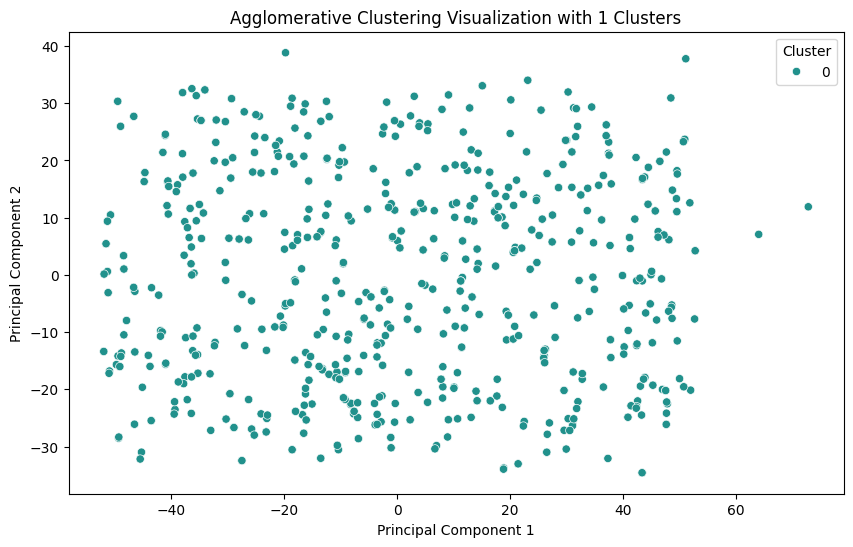

In [ ]:
# Visualize Clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=data_standardized['Cluster_ftc'], palette='viridis')
plt.title(f'Agglomerative Clustering Visualization with {num_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

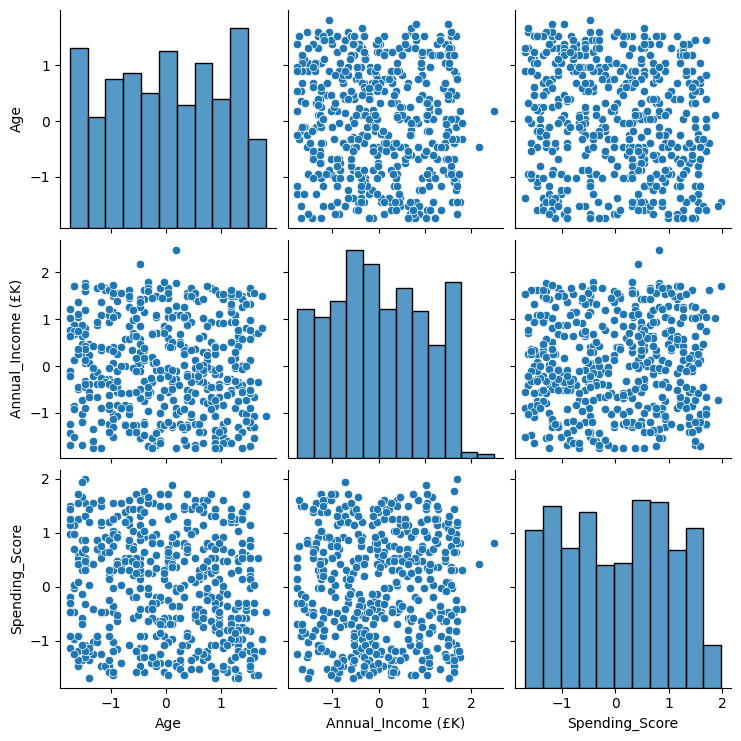

In [ ]:
sns.pairplot(data_standardized[num_cols])
plt.show()


### DBSCAN (Density-Based Clustering)


DBSCAN is a powerful clustering algorithm that groups dense regions and identifies outliers as noise. Unlike K-Means and Hierarchical Clustering, DBSCAN does not require the number of clusters (k) to be specified beforehand.

DBSCAN has two main parameters:

   1. eps (ε) → Maximum radius of the neighborhood for a point to be considered part of a cluster.

  2. min_samples → Minimum number of points in a neighborhood (ε) to form a dense region.

   3. DBSCAN Classifies Points as: Core Points → Have at least min_samples neighbors within eps.

   4. Border Points → Are within eps of a core point but have fewer than min_samples neighbors.

   5. Noise (Outliers) → Do not belong to any cluster.

In [ ]:
# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_standardized[num_cols])

In [ ]:
# Find the optimal eps using the k-distance method
from sklearn.neighbors import NearestNeighbors # import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(data_scaled) # Assuming 'data_scaled' is correctly defined

NearestNeighbors()

In [ ]:
distances, indices = nearest_neighbors.kneighbors(data_scaled)

In [ ]:
distances, indices

(array([[0.        , 0.10856719, 0.18397385, 0.21598991, 0.28953066],
        [0.        , 0.07112696, 0.3565113 , 0.38037372, 0.38037372],
        [0.        , 0.32816845, 0.32816845, 0.32896413, 0.36158285],
        ...,
        [0.        , 0.23621082, 0.26640699, 0.32893633, 0.54540046],
        [0.        , 0.09031653, 0.25075929, 0.28794147, 0.30112807],
        [0.        , 0.07112696, 0.28794147, 0.28794147, 0.32057232]]),
 array([[  0, 400, 385, 531, 131],
        [  1, 401, 181, 666, 266],
        [  2, 573, 173, 771, 390],
        ...,
        [797, 414,  14, 429, 301],
        [798, 398, 579, 325, 600],
        [799, 399, 118, 518, 623]]))

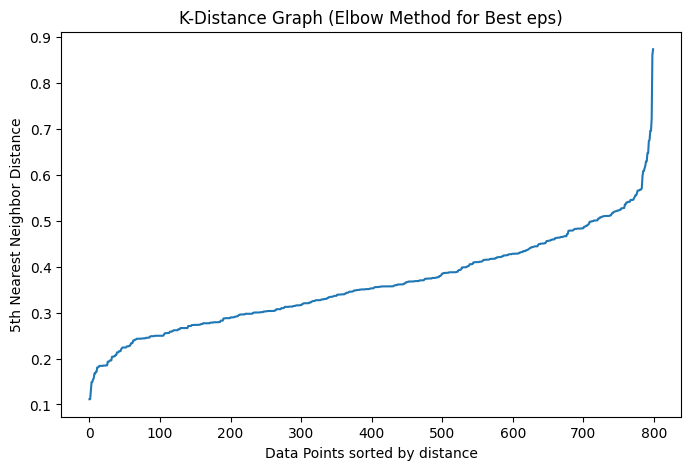

In [ ]:
# Sort and plot the distances of the 5th nearest neighbor for each point
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph (Elbow Method for Best eps)")
plt.show()

In [ ]:
# Apply DBSCAN
eps_value = 0.5  # Set based on the K-Distance plot
min_samples_value = 5  # Typically between 3-10

In [ ]:
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(data_scaled)

In [ ]:
# Add the cluster labels to the dataframe
data_standardized['Cluster_DBSCAN'] = clusters

In [ ]:
data_standardized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,GMM_Cluster,Cluster_k,Cluster_DBSCAN
0,-1.313270,-0.213815,-1.017854,False,True,0,2,2,0
1,0.678284,-0.316344,0.206665,False,True,3,0,2,0
2,-0.032985,-1.273280,-1.073514,True,False,1,2,2,0
3,-1.597778,0.811473,0.540625,True,False,0,1,0,0
4,-0.886509,-0.555578,0.484965,True,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...
795,0.080818,0.401358,-0.683894,True,False,2,1,3,0
796,-1.028763,-0.623931,0.151005,True,False,1,0,1,0
797,0.322650,1.050707,-1.630113,False,True,3,1,3,0
798,-0.388620,0.162124,1.375524,False,True,1,1,0,0


In [ ]:
# Check unique clusters
np.unique(clusters)

array([-1,  0,  1,  2])

-1 represents noise (outliers).
The remaining numbers represent valid clusters.

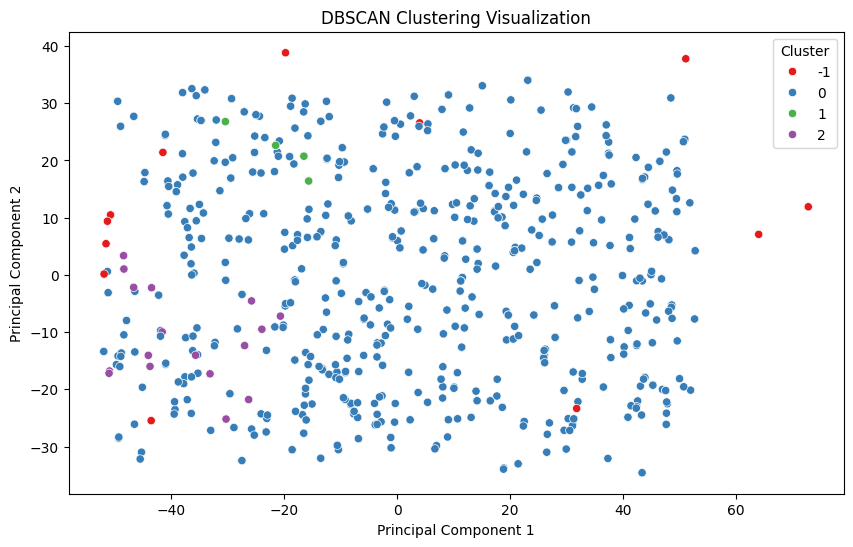

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=data_standardized['Cluster_DBSCAN'], palette='Set1')
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# evulating cluster
unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"DBSCAN found {unique_clusters} clusters.")


DBSCAN found 3 clusters.


In [ ]:
# no of outliers
noise_points = np.sum(clusters == -1)
print(f"DBSCAN identified {noise_points} outliers.")


DBSCAN identified 18 outliers.


In [ ]:
from sklearn.metrics import silhouette_score

if unique_clusters > 1:
    silhouette = silhouette_score(data_scaled, clusters)
    print(f"Silhouette Score: {silhouette:.2f}")
else:
    print("Silhouette Score cannot be calculated as only one cluster is found.")


Silhouette Score: -0.03


 When to Use DBSCAN?

1.  When clusters have irregular shapes (e.g., customer behavior, spatial data).

2. When you don’t know the number of clusters.

3. When you want to identify outliers (e.g., fraud detection, anomaly detection).

4. Not great for large datasets → Slower than K-Means for millions of points.

If clustering is not working well, try adjusting:

Increase/Decrease eps:

    Too low → Too many outliers.

    Too high → Merges too many clusters.

Change min_samples:

    Lower → Allows more small clusters to form.

    Higher → Requires denser clusters.

### Gaussian Mixture Model (GMM)

In [ ]:
# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)  # Choose the number of components (clusters)
gmm_labels = gmm.fit_predict(pca_df)

In [ ]:
data_standardized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,GMM_Cluster,Cluster_k
0,-1.313270,-0.213815,-1.017854,False,True,0,2,2
1,0.678284,-0.316344,0.206665,False,True,3,0,2
2,-0.032985,-1.273280,-1.073514,True,False,1,2,2
3,-1.597778,0.811473,0.540625,True,False,0,1,0
4,-0.886509,-0.555578,0.484965,True,False,1,0,1
...,...,...,...,...,...,...,...,...
795,0.080818,0.401358,-0.683894,True,False,2,1,3
796,-1.028763,-0.623931,0.151005,True,False,1,0,1
797,0.322650,1.050707,-1.630113,False,True,3,1,3
798,-0.388620,0.162124,1.375524,False,True,1,1,0


In [ ]:
# Add the GMM labels to the dataset for visualization
data_standardized['GMM_Cluster'] = gmm_labels

In [ ]:
data_standardized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,GMM_Cluster,Cluster_k
0,-1.313270,-0.213815,-1.017854,False,True,0,2,2
1,0.678284,-0.316344,0.206665,False,True,3,0,2
2,-0.032985,-1.273280,-1.073514,True,False,1,2,2
3,-1.597778,0.811473,0.540625,True,False,0,1,0
4,-0.886509,-0.555578,0.484965,True,False,1,0,1
...,...,...,...,...,...,...,...,...
795,0.080818,0.401358,-0.683894,True,False,2,1,3
796,-1.028763,-0.623931,0.151005,True,False,1,0,1
797,0.322650,1.050707,-1.630113,False,True,3,1,3
798,-0.388620,0.162124,1.375524,False,True,1,1,0


In [ ]:
# Silhouette score for KMeans
kmeans_silhouette = silhouette_score(pca_df, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Silhouette score for GMM
gmm_silhouette = silhouette_score(pca_df, gmm_labels)
print(f"GMM Silhouette Score: {gmm_silhouette}")


K-Means Silhouette Score: 0.37349880847752487
GMM Silhouette Score: 0.3853120694880353


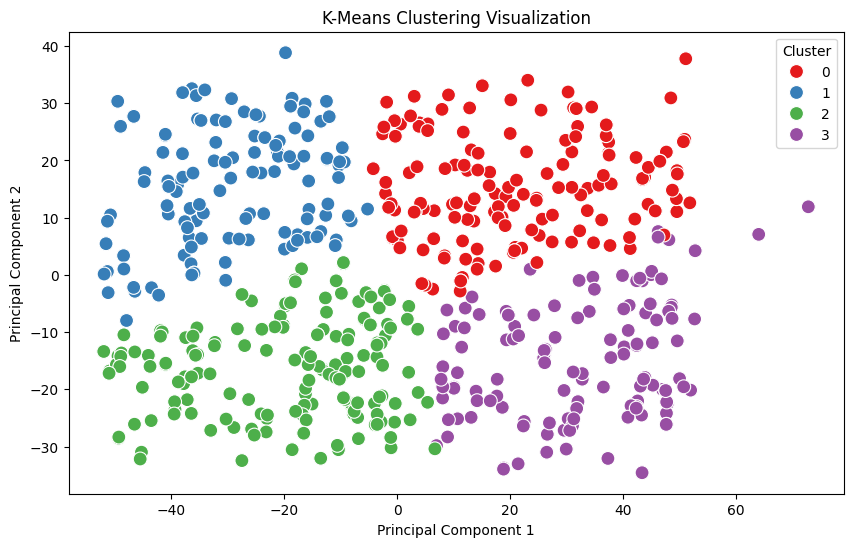

In [ ]:
# Visualize K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=data_standardized['Cluster_k'], palette='Set1', s=100)
plt.title("K-Means Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


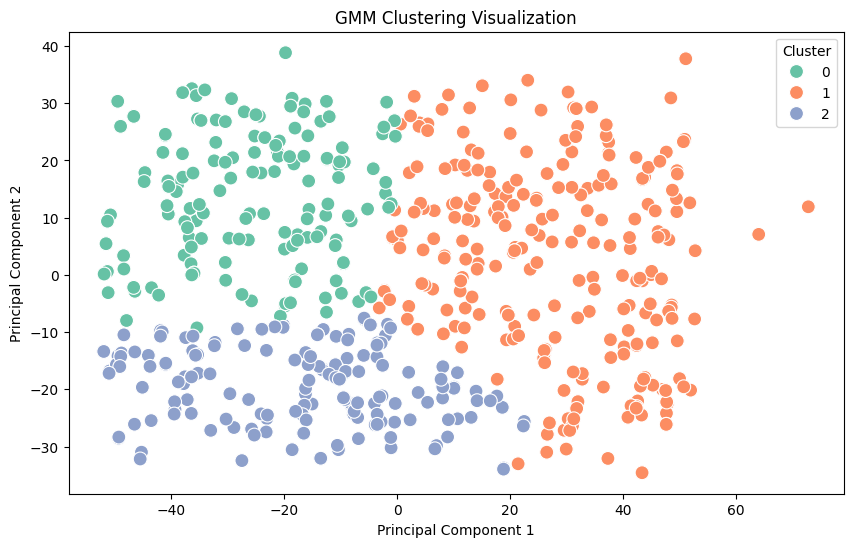

In [ ]:
# Visualize GMM clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=data_standardized['GMM_Cluster'], palette='Set2', s=100)
plt.title("GMM Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()



### Visualize the Probability Distributions for Customer Segments

In [ ]:
# Create a grid for visualization
x_min, x_max = pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1
y_min, y_max = pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

In [ ]:
# Predict probabilities for each point in the grid
Z = gmm.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(300, 300, 3)  # Reshaping to match the number of clusters

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


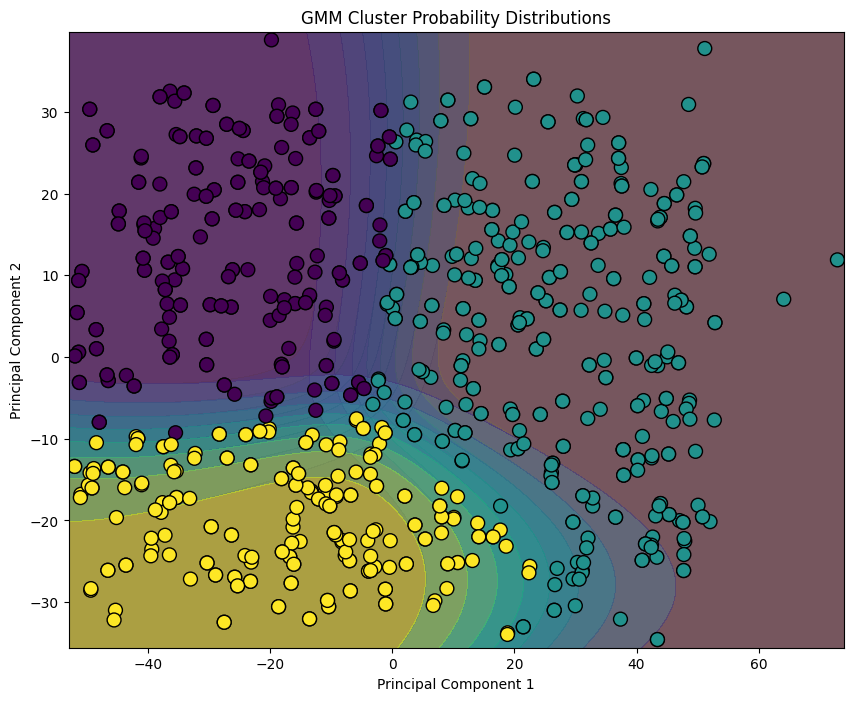

In [ ]:
# Plot GMM decision boundaries and probability distributions
plt.figure(figsize=(10, 8))
for i in range(3):  # For each cluster
    plt.contourf(xx, yy, Z[:, :, i], levels=np.linspace(0, 1, 10), alpha=0.6, cmap='viridis')

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data_standardized['GMM_Cluster'], cmap='viridis', s=100, edgecolors='k')
plt.title("GMM Cluster Probability Distributions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Interpret Results:

1. Silhouette Score: Compare the silhouette scores from both K-Means and GMM to see which method provides better clustering.

2. Visualizations: The visualizations will show how the data points are grouped into clusters. K-Means may have hard boundaries between clusters, while GMM will show softer, probabilistic boundaries (shaded regions).

3. Probability Distributions: The contours in the last plot represent the probability density of each cluster at different points in the feature space. GMM's soft clustering allows each point to have a probability of belonging to multiple clusters, unlike K-Means, which assigns each point to a single cluster.

 Conclusion:

 1. If the GMM results show clearer segmentation with higher silhouette scores, it suggests that the Gaussian Mixture Model is a better choice for the data.

 2. The visualizations and probability distributions help you understand the uncertainty in clustering (with GMM), especially when some data points lie on the boundary between clusters.

# compare and evalute model

In [ ]:
# Silhouette score for KMeans
kmeans_silhouette = silhouette_score(pca_df, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Silhouette score for GMM
gmm_silhouette = silhouette_score(pca_df, gmm_labels)
print(f"GMM Silhouette Score: {gmm_silhouette}")

K-Means Silhouette Score: 0.37349880847752487
GMM Silhouette Score: 0.3853120694880353


 A higher silhouette score indicates better-defined clusters. This metric helps assess both cohesion (how close points within the same cluster are) and separation (how distinct the clusters are from each other).

In [ ]:
# Davies-Bouldin Index for K-Means
kmeans_db_index = davies_bouldin_score(pca_df, kmeans_labels)
print(f"K-Means Davies-Bouldin Index: {kmeans_db_index}")

# Davies-Bouldin Index for GMM
gmm_db_index = davies_bouldin_score(pca_df, gmm_labels)
print(f"GMM Davies-Bouldin Index: {gmm_db_index}")

K-Means Davies-Bouldin Index: 0.9350982551283072
GMM Davies-Bouldin Index: 0.9254602931408266


Lower values of the Davies-Bouldin Index indicate better clustering. This index evaluates how similar each cluster is to the most similar cluster, so lower values represent well-separated clusters.

In [ ]:
# Calinski-Harabasz Index for K-Means
kmeans_ch_index = calinski_harabasz_score(pca_df, kmeans_labels)
print(f"K-Means Calinski-Harabasz Index: {kmeans_ch_index}")

# Calinski-Harabasz Index for GMM
gmm_ch_index = calinski_harabasz_score(pca_df, gmm_labels)
print(f"GMM Calinski-Harabasz Index: {gmm_ch_index}")

K-Means Calinski-Harabasz Index: 737.8166463541346
GMM Calinski-Harabasz Index: 707.0048177777869


Higher values of the Calinski-Harabasz Index indicate better clustering. This index is based on the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values imply that the clusters are well-separated and compact.

**Silhouette Score:**

 The model with the higher silhouette score provides better cohesion and separation between clusters.

Davies-Bouldin Index: **bold text**

The model with the lower Davies-Bouldin score offers better-defined clusters with less similarity to other clusters.

**Calinski-Harabasz Index:**

 The model with the higher Calinski-Harabasz score indicates better separation between clusters.

# undersanding

In [ ]:
data_standardized

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,GMM_Cluster,Cluster_k,Cluster_DBSCAN
0,-1.313270,-0.213815,-1.017854,False,True,0,2,2,0
1,0.678284,-0.316344,0.206665,False,True,3,0,2,0
2,-0.032985,-1.273280,-1.073514,True,False,1,2,2,0
3,-1.597778,0.811473,0.540625,True,False,0,1,0,0
4,-0.886509,-0.555578,0.484965,True,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...
795,0.080818,0.401358,-0.683894,True,False,2,1,3,0
796,-1.028763,-0.623931,0.151005,True,False,1,0,1,0
797,0.322650,1.050707,-1.630113,False,True,3,1,3,0
798,-0.388620,0.162124,1.375524,False,True,1,1,0,0


In [ ]:
# Calculate summary statistics for each cluster to understand the characteristics
kmeans_summary = data_standardized.groupby('Cluster_k').mean()
gmm_summary = data_standardized.groupby('GMM_Cluster').mean()


In [ ]:
print("K-Means Cluster Summary:")
kmeans_summary

K-Means Cluster Summary:


,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,GMM_Cluster,Cluster_DBSCAN
Cluster_k,,,,,,,,
0,-0.166145,0.709818,0.867113,0.566210,0.433790,1.872146,0.922374,-0.009132
1,-0.138057,-1.028405,0.791596,0.587302,0.412698,1.116402,0.000000,0.058201
2,0.305439,-0.638944,-0.932575,0.553571,0.446429,1.678571,1.709821,0.160714
3,-0.035356,1.083582,-0.777456,0.529762,0.470238,1.946429,1.160714,-0.017857


In [ ]:
print("GMM Cluster Summary:")
gmm_summary

GMM Cluster Summary:


,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_hc,Cluster_k,Cluster_DBSCAN
GMM_Cluster,,,,,,,,
0,-0.145572,-0.898042,0.695426,0.576923,0.423077,1.222222,1.047009,0.064103
1,-0.088513,0.928954,0.206887,0.585227,0.414773,1.965909,1.252841,-0.014205
2,0.304768,-0.546028,-1.100719,0.500000,0.500000,1.616822,2.126168,0.149533


Create Personas

You can manually create personas based on the summary statistics above. For example:

Cluster 0 (K-Means or GMM):
Persona: High-Value Shoppers (High income, high spending score)

Strategy: Offer personalized high-end products and VIP discounts.

Cluster 1:
Persona: Casual Browsers (Moderate income, moderate spending)

Strategy: Retarget these users with special discounts to encourage purchases.

Cluster 2:
Persona: Discount Seekers (Lower income, low-to-moderate spending)

Strategy: Offer time-sensitive deals and exclusive promotions.

In [ ]:
# Marketing strategies for high-value shoppers (e.g., KMeans Cluster 0)
high_value_shoppers = data_standardized[data_standardized['Cluster_k'] == 0]
print(high_value_shoppers)

          Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
3   -1.597778            0.811473        0.540625           True        False   
9   -0.744255            0.572239        0.540625           True        False   
12   0.749411            0.298829        0.317985           True        False   
19  -1.668905            1.700057        1.152885           True        False   
23   0.678284            0.640592        0.707605          False         True   
..        ...                 ...             ...            ...          ...   
776 -1.597778            0.367182        0.095345          False         True   
777 -1.597778            0.743121        1.709484          False         True   
787  1.176173            0.503887        0.262325          False         True   
792  0.109269           -0.077110        0.930245          False         True   
798 -0.388620            0.162124        1.375524          False         True   

     Cluster_hc  GMM_Cluste